# What is Word Embedding? 

## "word embedding" or "word vector"

## "詞嵌入" or "詞向量"

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-king-queen-vectors.png?w=656&zoom=2)

# Cosine similarity between two vectors

<img src='https://pic3.zhimg.com/v2-fc17fd8286802d0ad2ff45e4068cc489_1200x500.jpg'>

Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as

![](https://i.stack.imgur.com/Qmq2w.png)

where Ai and Bi are components of vector A and B respectively.

The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation, while in-between values indicate intermediate similarity or dissimilarity.

Reference:
https://www.wikiwand.com/en/Cosine_similarity

# Reasoning with word vectors

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-gender-relation.png?w=596&zoom=2)

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-plural-relation.png?w=610&zoom=2)

Reference: https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/

# Word2vec

![](https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-66808-6_16/MediaObjects/456304_1_En_16_Fig3_HTML.gif)

![](https://miro.medium.com/max/1280/0*EGByb1WV6Uz8vjST.jpg)

![](https://miro.medium.com/max/664/1*TRsyvDhPB6_KCimEk-2kWQ.png)

Shallow vs. Deep learning

![](https://www.guru99.com/images/1/111318_0826_WordEmbeddi1.png)

![](https://pbs.twimg.com/media/DXrYK-bXUAAhctK?format=jpg&name=large)

# Doc2vec 

![](https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-66808-6_16/MediaObjects/456304_1_En_16_Fig4_HTML.gif)

Distributed Memory version of Paragraph Vector (PV-DM)

![](https://miro.medium.com/max/972/0*x-gtU4UlO8FAsRvL.)

Distributed Bag of Words version of Paragraph Vector (PV-DBOW)

![](https://miro.medium.com/max/880/0*NtIsrbd4VQzUKVKr.)

![](https://www.researchgate.net/profile/Le-Lu-9/publication/303376372/figure/fig6/AS:668376489816091@1536364781736/Example-words-embedded-in-the-vector-space-using-word-to-vector-modeling.png)

# Gensim doc2vec package

![](https://radimrehurek.com/gensim/_static/images/gensim.png)

In [1]:
# install package
# !pip install gensim==3.8.3

# Prepare training data with TaggedDocument format

In [1]:
# define documents 
train_docs = [
    'machine learning',
    'deep learning',
    'machine learning deep learning',
    'good work',
    'good job',
    'good work good job'
]

In [3]:
from gensim.models.doc2vec import TaggedDocument

In [4]:
documents = []
for i, text in enumerate( train_docs ):
    # prepare tokenized word list
    words = text.lower().split()
    # prepare document number
    tags = ['doc_{}'.format(i)]
    # prepare document format for Doc2vec training
    documents.append(TaggedDocument(words, tags))

In [5]:
documents

[TaggedDocument(words=['machine', 'learning'], tags=['doc_0']),
 TaggedDocument(words=['deep', 'learning'], tags=['doc_1']),
 TaggedDocument(words=['machine', 'learning', 'deep', 'learning'], tags=['doc_2']),
 TaggedDocument(words=['good', 'work'], tags=['doc_3']),
 TaggedDocument(words=['good', 'job'], tags=['doc_4']),
 TaggedDocument(words=['good', 'work', 'good', 'job'], tags=['doc_5'])]

In [6]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [7]:
documents2 = [TaggedDocument(doc, ["doc_{}".format(i)]) for i, doc in enumerate(common_texts)]

In [8]:
documents2 

[TaggedDocument(words=['human', 'interface', 'computer'], tags=['doc_0']),
 TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=['doc_1']),
 TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=['doc_2']),
 TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=['doc_3']),
 TaggedDocument(words=['user', 'response', 'time'], tags=['doc_4']),
 TaggedDocument(words=['trees'], tags=['doc_5']),
 TaggedDocument(words=['graph', 'trees'], tags=['doc_6']),
 TaggedDocument(words=['graph', 'minors', 'trees'], tags=['doc_7']),
 TaggedDocument(words=['graph', 'minors', 'survey'], tags=['doc_8'])]

# Train the doc2vec model

In [9]:
from gensim.models.doc2vec import Doc2Vec

In [10]:
%%time
# Train model
# epochs = 5 
model = Doc2Vec(documents, vector_size = 2, window = 5, min_count = 1, workers = 4, epochs = 7)

CPU times: total: 15.6 ms
Wall time: 100 ms


# Save model

In [11]:
model.save("./simple_doc2vec.model")

# Load Doc2vec model

In [12]:
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec.load("./simple_doc2vec.model")

# Word vector and document vector

## word vectors

In [16]:
model.wv.index_to_key

['good', 'learning', 'job', 'work', 'deep', 'machine']

In [17]:
model.wv.vectors

array([[-0.02681136,  0.01182157],
       [ 0.25516748,  0.45046365],
       [-0.4651475 , -0.35584044],
       [ 0.32294363,  0.4486494 ],
       [-0.2507714 , -0.18816859],
       [ 0.36902523, -0.07667357]], dtype=float32)

# get vector for a word

In [18]:
model.wv.word_vec('work')

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\1097064260.py:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  model.wv.word_vec('work')


array([0.32294363, 0.4486494 ], dtype=float32)

In [19]:
model.wv.word_vec('good')

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\4100944095.py:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  model.wv.word_vec('good')


array([-0.02681136,  0.01182157], dtype=float32)

In [8]:
# if input word is not in the wordindex, error will arise
# model.wv.word_vec('data')

## document vectors

In [22]:
model.docvecs.index_to_key

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\4164750585.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.index_to_key


['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5']

In [24]:
model.docvecs.vectors

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\2727991311.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.vectors


array([[-0.26154077, -0.29895633],
       [-0.49411625,  0.42764473],
       [ 0.17838673,  0.01315755],
       [-0.493913  , -0.25835383],
       [-0.48611858,  0.10064545],
       [ 0.14173782,  0.23219481]], dtype=float32)

In [11]:
# get vector for a document

In [25]:
model.docvecs['doc_0']

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\1231349363.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs['doc_0']


array([-0.26154077, -0.29895633], dtype=float32)

In [26]:
model.docvecs['doc_1']

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\651019407.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs['doc_1']


array([-0.49411625,  0.42764473], dtype=float32)

# Draw 2D vectors

In [27]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [28]:
def plot_with_labels(low_dim_embs, labels, filename = 'tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    # plt.figure(figsize=(10, 8))  # in inches (larger graph)
    plt.figure(figsize=(8, 6))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy = (x, y),
                 xytext = (5, 2),
                 textcoords = 'offset points',
                 ha = 'right',
                 va = 'bottom')
    plt.savefig(filename)

## Draw word vectors

In [30]:
words = model.wv.index_to_key

In [31]:
vectors = model.wv.vectors

In [32]:
# Creating the tsne plot 
tsne = TSNE(perplexity = 30.0, n_components = 2, init = 'pca', n_iter = 5000)

In [33]:
# It will take time
two_dim_vectors = tsne.fit_transform(vectors)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


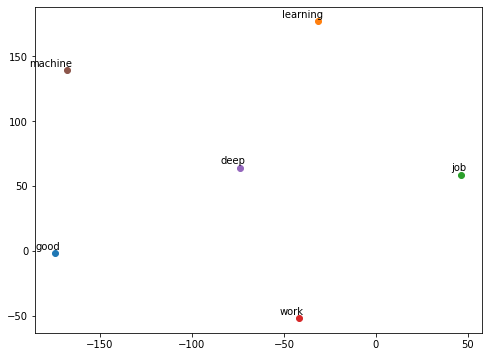

In [34]:
# Plotting and saving the fig 
plot_with_labels(two_dim_vectors, words)

## Draw document vectors

In [35]:
words = model.docvecs.index_to_key

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\1045885723.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  words = model.docvecs.index_to_key


In [37]:
vectors = model.docvecs.vectors

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\3799227662.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors = model.docvecs.vectors


In [38]:
# It will take time
two_dim_vectors = tsne.fit_transform(vectors)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


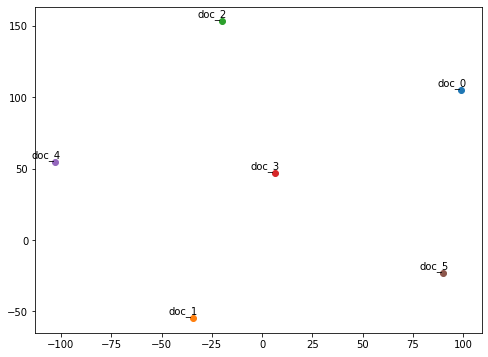

In [39]:
# Plotting and saving the fig 
plot_with_labels(two_dim_vectors, words)

# Find the most similar words

## Cosine similarity from -1 to 1

![](https://i.stack.imgur.com/5hD3g.png)

## similarity score

In [40]:
model.wv.most_similar(['learning'], topn=3)

[('work', 0.9941185116767883),
 ('machine', 0.305563747882843),
 ('good', -0.09994741529226303)]

In [41]:
# similarity score
model.wv.similarity('machine','learning')

0.30556372

In [42]:
model.wv.most_similar(['good'], topn = 3)

[('deep', 0.48973965644836426),
 ('job', 0.4816059172153473),
 ('learning', -0.09994742274284363)]

In [43]:
model.wv.similarity('good','job')

0.4816059

In [44]:
# the two words are not similar, because the similarity socre is small. 
model.wv.similarity('good','machine')

-0.97794414

### Find the most similar words based on a set of words

In [45]:
model.wv.most_similar(['deep','learning'], topn = 3)

[('good', 0.953560471534729),
 ('job', 0.19527064263820648),
 ('work', 0.0971737876534462)]

### Positive and nagative similarity

In [46]:
model.wv.most_similar(positive=['good', 'job'], topn = 3)

[('deep', 0.8653990626335144),
 ('learning', -0.5925893783569336),
 ('work', -0.6763386130332947)]

In [47]:
# find points in the vector space that are as close as possible to the positive vectors
# and as far away as possible from the negative words
model.wv.most_similar(positive=['good', 'job'], negative = ['machine', 'learning'], topn = 3)

[('deep', 0.9299444556236267), ('work', -0.7777612805366516)]

## Infer vector of keywords from the word2vec model (vector space) 輸入一個詞或多個詞，推論計算代表這一組詞的向量

In [48]:
# infer vector of keywords from the word2vec model (vector space)
model.infer_vector(['machine'])

array([-0.11741042, -0.19451982], dtype=float32)

In [49]:
# 
model.wv.word_vec('machine')

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\629783342.py:2: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  model.wv.word_vec('machine')


array([ 0.36902523, -0.07667357], dtype=float32)

In [50]:
# given a set of words in a document, infer_vector() infers a new vector  
model.infer_vector( ['machine', 'learning'] )

array([ 0.18918513, -0.01227807], dtype=float32)

In [36]:
# if some words are not in the word index, 
# infer_vecter() can deal with this, and it will not throw exception
# for example:  ['machine', 'learning', 'data' ] 
# 'data' is not in the word index

In [51]:
model.infer_vector(['machine', 'learning', 'data' ])

array([ 0.23044683, -0.19492395], dtype=float32)

## Given a set of new keywords, find similar documents輸入一個詞或多個詞，找出幾篇相似的文章給你

In [52]:
keywords = ['machine', 'learning', 'job' ]

# infer vector of keywords from the word2vec model (vector space)
new_vector = model.infer_vector(keywords)

In [53]:
new_vector

array([ 0.17611279, -0.05679075], dtype=float32)

In [54]:
# based on the vector, find several nearby tags (item_id) 
model.docvecs.most_similar(positive = [new_vector], topn =5)

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\4240576568.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar( positive= [new_vector], topn=5  )


[('doc_2', 0.9265859127044678),
 ('doc_5', 0.2339228391647339),
 ('doc_0', -0.3956749439239502),
 ('doc_3', -0.7010857462882996),
 ('doc_1', -0.9204879403114319)]

In [56]:
# keywords can contain words which are not in the word index
# infer_vecter() can deal with this, and it will not throw exception
keywords = ['machine', 'learning', 'data' ]
new_vector = model.infer_vector( keywords,  epochs = 20, alpha = 0.025)
model.docvecs.most_similar(positive= [new_vector], topn =5 )

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\659875514.py:5: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(positive= [new_vector], topn =5 )


[('doc_2', 0.7138081789016724),
 ('doc_0', -0.01649193838238716),
 ('doc_5', -0.1535891443490982),
 ('doc_3', -0.37704989314079285),
 ('doc_4', -0.8784939646720886)]

# Find the most similar documents輸入一篇文章編號，找出幾篇相似的文章給你

## Given an item_id, find similar documents

In [57]:
# Find the top-N most similar documents

# e.g., find similar documents for the first item_id
model.docvecs.most_similar(['doc_0'], topn=5)

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\345565659.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(['doc_0'], topn=5)


[('doc_3', 0.9322853088378906),
 ('doc_4', 0.49217653274536133),
 ('doc_1', 0.005333602894097567),
 ('doc_2', -0.7120180130004883),
 ('doc_5', -0.9854675531387329)]

In [58]:
model.docvecs.most_similar('doc_0')

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\347376770.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar('doc_0')


[('doc_3', 0.9322853088378906),
 ('doc_4', 0.49217653274536133),
 ('doc_1', 0.005333602894097567),
 ('doc_2', -0.7120180130004883),
 ('doc_5', -0.9854675531387329)]

In [59]:
model.docvecs.similarity('doc_0','doc_5')

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\1102969423.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.similarity('doc_0','doc_5')


-0.98546743

## find the most similar documents based on a set of documents輸入幾篇文章編號，找出幾篇相似的文章給你

In [60]:
model.docvecs.most_similar(['doc_0', 'doc_1'], topn = 3)

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\1297811650.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(['doc_0', 'doc_1'], topn = 3)


[('doc_4', 0.9628377556800842),
 ('doc_3', 0.9160753488540649),
 ('doc_5', -0.5788949728012085)]

In [61]:
model.docvecs.n_similarity( ['doc_0', 'doc_1'], ['doc_2'])

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\207899948.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.n_similarity( ['doc_0', 'doc_1'], ['doc_2'])


-0.97078705

In [62]:
model.docvecs.n_similarity( ['doc_0', 'doc_1'], ['doc_5'])

C:\Users\USER\AppData\Local\Temp\ipykernel_42052\3554709847.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.n_similarity( ['doc_0', 'doc_1'], ['doc_5'])


-0.37033433

# For more information about word embeddings, visit the following links: